##### 샘플 데이터

In [1]:
import pandas as pd
import pickle
from ast import literal_eval

# CSV 파일을 읽어와서 DataFrame으로 저장
df = pd.read_csv("Cluster1.csv")
# tagged_review 열의 문자열을 리스트로 변환
df['tagged_review'] = df['tagged_review'].apply(literal_eval)

# DataFrame을 pickle 파일로 저장
with open("./actor.pkl", 'wb') as f:
    pickle.dump(df, f)


In [5]:
df['tagged_review'][0]

0       [찾다, 중요하다, 주의, 위, 정보, 일반, 건강, 정보, 개인, 건강, 상태, ...
1       [발렌타인, 초콜릿, 주다, 이유, 성질, 내지, 말, 주다, 남녀, 우울하다, 기...
2       [다니다, 좋다, 일이, 역시, 우리나라, 정신과, 인식, 안좋다, 거지, 감기, ...
3       [나아가다, 위해, 여러가지, 활동, 시도, 볼, 수, 이러하다, 아주, 작다, 활...
4       [안, 우울하다, 눕다, 하루, 망치다, 십상, 개인, 우울, 이유, 대처, 방안,...
                              ...                        
1255                                   [새롭다, 분위기, 조성, 좋다]
1256                  [청소, 부분, 부분, 청소, 티, 안나, 크다, 효과, 없다]
1257     [가구, 배치, 변화, 주다, 쌓이다, 먼지, 청소, 새롭다, 분위기, 느끼다, 보다]
1258                                             [울면, 먹다]
1259                                  [약, 먹다, 지속, 치료, 도움]
Name: tagged_review, Length: 1260, dtype: object

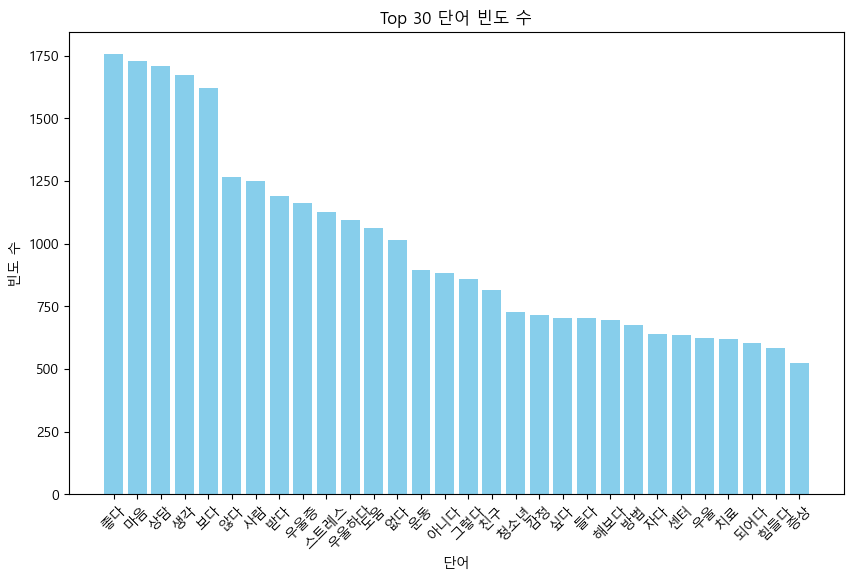

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
from collections import Counter

# 한글 글꼴 설정 (Windows)
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 1글자 단어 제외하고 각 단어의 빈도수를 계산
word_counter = Counter([word for review in df['tagged_review'] for word in review if len(word) > 1])

# 상위 30개 단어들로 데이터프레임 생성
freq_df = pd.DataFrame(word_counter.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(30)

# 차트 생성
plt.figure(figsize=(10, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도 수')
plt.title('Top 30 단어 빈도 수')
plt.xticks(rotation=45)
plt.show()


In [2]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open("./actor.pkl", 'rb') as f : # read binary
  df = pickle.load(f)

df.head()

,Unnamed: 0,Content_Clean,tokenized,nouns,adjectives,verbs,Review_clean,Tagged_Review,tagged_review,vector,cluster
0,0,찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,"[('찾는', 'Verb'), ('것', 'Noun'), ('이', 'Josa'),...","['주의', '정보', '일반', '건강', '정보', '개인', '건강', '상태...","['중요합니다', '다를', '있습니다', '궁금한', '있다면', '불안한', '...","['찾는', '따라', '달래주는']",찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,"['찾다', '중요하다', '주의', '위', '정보', '일반', '건강', '정...","[찾다, 중요하다, 주의, 위, 정보, 일반, 건강, 정보, 개인, 건강, 상태, ...",[-0.02016796 -0.07014758 -0.04006024 0.029492...,0
1,1,되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,"[('되는', 'Verb'), ('것', 'Noun'), ('이고', 'Josa')...","['발렌타인', '초콜릿', '이유', '성질', '내지', '남녀', '기분', ...","['우울할', '안좋을', '좋은', '풍부한']","['되는', '주는', '주는', '먹으면', '하면']",되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,"['발렌타인', '초콜릿', '주다', '이유', '성질', '내지', '말', '...","[발렌타인, 초콜릿, 주다, 이유, 성질, 내지, 말, 주다, 남녀, 우울하다, 기...",[-7.84606300e-03 -1.68574357e-03 -7.71790743e-...,0
2,2,다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,"[('다니는', 'Verb'), ('것', 'Noun'), ('도', 'Josa')...","['일이', '역시', '우리나라', '정신과', '인식', '거지', '감기', ...","['좋은', '안좋은']","['다니는', '걸리면', '가서', '받고', '나아지고', '나면', '가서',...",다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,"['다니다', '좋다', '일이', '역시', '우리나라', '정신과', '인식',...","[다니다, 좋다, 일이, 역시, 우리나라, 정신과, 인식, 안좋다, 거지, 감기, ...",[-0.02237777 -0.0101667 -0.01124584 -0.005734...,0
3,3,나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,"[('나아가기', 'Verb'), ('위해', 'Noun'), ('여러가지', 'N...","['위해', '여러가지', '활동', '시도', '아주', '활동', '긍정', '...","['있는데요', '이러한', '작은', '있습니다', '우울할', '좋은', '있는...","['나아가기', '나아가는데', '하면', '해보려', '합니다', '시켜줄']",나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,"['나아가다', '위해', '여러가지', '활동', '시도', '볼', '수', '...","[나아가다, 위해, 여러가지, 활동, 시도, 볼, 수, 이러하다, 아주, 작다, 활...",[-0.02829694 0.04723243 0.04732933 -0.015671...,0
4,4,안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,"[('안', 'Noun'), ('하면', 'Verb'), ('우울하다고', 'Adj...","['하루', '십상', '개인', '우울', '이유', '대처', '방안', '생활...","['우울하다고', '싫고', '편하니', '우울해져요', '아니면', '싫은']","['하면', '누워있다가', '망치기', '이었습니다', '지켜야', '적고', '...",안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,"['안', '우울하다', '눕다', '하루', '망치다', '십상', '개인', '...","[안, 우울하다, 눕다, 하루, 망치다, 십상, 개인, 우울, 이유, 대처, 방안,...",[ 0.00601314 0.01752039 -0.01435016 -0.024003...,0


In [5]:
df2 = df[["Content_Clean", "tagged_review", "cluster"]].copy()
df2.head()

,Content_Clean,tagged_review,cluster
0,찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,"[찾다, 중요하다, 주의, 위, 정보, 일반, 건강, 정보, 개인, 건강, 상태, ...",0
1,되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,"[발렌타인, 초콜릿, 주다, 이유, 성질, 내지, 말, 주다, 남녀, 우울하다, 기...",0
2,다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,"[다니다, 좋다, 일이, 역시, 우리나라, 정신과, 인식, 안좋다, 거지, 감기, ...",0
3,나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,"[나아가다, 위해, 여러가지, 활동, 시도, 볼, 수, 이러하다, 아주, 작다, 활...",0
4,안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,"[안, 우울하다, 눕다, 하루, 망치다, 십상, 개인, 우울, 이유, 대처, 방안,...",0


# ◆ 1. LDA를 위한 데이터 전처리
* 1.1. 전체 단어의 사전 만들고 각 문서에 매칭하기
    > 단어들이 문서에 얼마나 위치해 있는지 분포를 파악해야하기 때문에 분석할 전체 데이터 대상으로
    사용된 단어의 사전을 생성해야한다,


In [6]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

### 1.1 전체 단어의 사전 만들고 각 문서에 매칭하기

In [7]:
df_cluster0 = df2[df2['cluster'] ==0]
display(df_cluster0.head())
display(df_cluster0.shape)

,Content_Clean,tagged_review,cluster
0,찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,"[찾다, 중요하다, 주의, 위, 정보, 일반, 건강, 정보, 개인, 건강, 상태, ...",0
1,되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,"[발렌타인, 초콜릿, 주다, 이유, 성질, 내지, 말, 주다, 남녀, 우울하다, 기...",0
2,다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,"[다니다, 좋다, 일이, 역시, 우리나라, 정신과, 인식, 안좋다, 거지, 감기, ...",0
3,나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,"[나아가다, 위해, 여러가지, 활동, 시도, 볼, 수, 이러하다, 아주, 작다, 활...",0
4,안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,"[안, 우울하다, 눕다, 하루, 망치다, 십상, 개인, 우울, 이유, 대처, 방안,...",0


(1025, 3)

In [8]:
# 단어사전 구축
all_docs = list(df_cluster0['tagged_review'])
dictionary = Dictionary(all_docs)

In [9]:
# 단어사전 확인
(dictionary.token2id)

{'가지': 0,
 '개인': 1,
 '건강': 2,
 '관련': 3,
 '광양': 4,
 '궁금하다': 5,
 '뇌': 6,
 '다르다': 7,
 '달래다': 8,
 '따르다': 9,
 '마음': 10,
 '방식': 11,
 '병원': 12,
 '불안하다': 13,
 '사랑': 14,
 '사진': 15,
 '상담': 16,
 '상태': 17,
 '수': 18,
 '우울증': 19,
 '워드': 20,
 '위': 21,
 '음식': 22,
 '일반': 23,
 '적용': 24,
 '전문가': 25,
 '점': 26,
 '정보': 27,
 '좋다': 28,
 '주의': 29,
 '중요하다': 30,
 '찾다': 31,
 '첨부': 32,
 '키': 33,
 '가다': 34,
 '감': 35,
 '기분': 36,
 '남녀': 37,
 '남자': 38,
 '내지': 39,
 '말': 40,
 '먹다': 41,
 '발렌타인': 42,
 '생선': 43,
 '섭취': 44,
 '성질': 45,
 '안좋다': 46,
 '오메가': 47,
 '우울': 48,
 '우울하다': 49,
 '이유': 50,
 '주다': 51,
 '초콜릿': 52,
 '풍부하다': 53,
 '감기': 54,
 '거지': 55,
 '걸리다': 56,
 '나다': 57,
 '나아지다': 58,
 '낫': 59,
 '다니다': 60,
 '듯이': 61,
 '받다': 62,
 '병': 63,
 '약': 64,
 '여드름': 65,
 '역시': 66,
 '우리나라': 67,
 '인식': 68,
 '일이': 69,
 '정신과': 70,
 '정신병': 71,
 '처방': 72,
 '치료': 73,
 '피부': 74,
 '긍정': 75,
 '나아가다': 76,
 '대해': 77,
 '도움': 78,
 '레쉬': 79,
 '리프': 80,
 '볼': 81,
 '산책': 82,
 '시도': 83,
 '아주': 84,
 '여러가지': 85,
 '오늘': 86,
 '요': 87,
 '요가': 88,
 '운동': 89,

In [10]:
# 단어사전 길이 확인
len(dictionary.token2id)

4838

In [11]:
# 구축된 단어사전을 이용해서 BOW 실시
corpus = []
for doc in all_docs :
  corpus.append(dictionary.doc2bow(doc))

In [12]:
len(corpus)

1025

In [13]:
corpus[10]

[(82, 1), (89, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1)]

# ◆ 2. LDA모델 만들기
* 2.1 LDA 기본 모델 만들기
* 2.2 LDA 토픽개수 선정
* 2.3 선정한 토픽 개수로 Action 넘버 매칭

### 2.1 LDA 기본 모델 만들기

In [14]:
topic_num = 3 # 임시로 3개로 선택.
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary)

In [15]:
# 토픽당 할당된 단어 확인
ldamodel.print_topics(num_words=5) # numwords 상위 단어들 중 중요하다고 생각하는 애들 정렬

[(0, '0.015*"우울하다" + 0.015*"생각" + 0.015*"좋다" + 0.014*"수" + 0.012*"보다"'),
 (1, '0.012*"좋다" + 0.011*"사람" + 0.011*"수" + 0.009*"우울하다" + 0.008*"상담"'),
 (2, '0.015*"좋다" + 0.011*"상담" + 0.011*"친구" + 0.011*"수" + 0.009*"보다"')]

In [16]:
# 문서별 topic 확률 확인
for i in range(len(corpus)):
  print(ldamodel.get_document_topics(corpus)[i])

[(0, 0.9818471)]
[(0, 0.96827376), (1, 0.015572579), (2, 0.016153693)]
[(0, 0.011616859), (1, 0.97715014), (2, 0.011232949)]
[(0, 0.97886014), (1, 0.01054764), (2, 0.010592193)]
[(0, 0.12933895), (1, 0.011898578), (2, 0.8587625)]
[(2, 0.98141485)]
[(0, 0.01103947), (1, 0.9786312), (2, 0.010329315)]
[(0, 0.019886829), (1, 0.019562913), (2, 0.96055025)]
[(0, 0.010595706), (2, 0.97973645)]
[(0, 0.96892256), (1, 0.015580042), (2, 0.015497449)]
[(0, 0.049218755), (1, 0.9087367), (2, 0.04204456)]
[(0, 0.9700066), (1, 0.015139917), (2, 0.014853496)]
[(0, 0.016035639), (1, 0.011108097), (2, 0.9728563)]
[(0, 0.5456444), (1, 0.44334546), (2, 0.011010179)]
[(0, 0.011975558), (1, 0.060639743), (2, 0.9273847)]
[(0, 0.01944709), (1, 0.9627924), (2, 0.017760575)]
[(0, 0.9780419), (1, 0.010693473), (2, 0.011264614)]
[(0, 0.0100215385), (1, 0.010360697), (2, 0.9796177)]
[(0, 0.9754158), (1, 0.012150444), (2, 0.012433729)]
[(0, 0.96179473), (1, 0.018257832), (2, 0.019947423)]
[(0, 0.9773345), (1, 0.0114

### 2.2 LDA 토픽개수 선정
* coherence & perplexcity

In [17]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# coherence_model 만들어서 체크 : 토픽 개수를 3개로 설정했을때의 점수

top_n = 4  # 토픽을 3개로 잡았을 때에 coher와 perpl를 잡을 수 있게 하는 것

#perplexity
perplexity_score = ldamodel.log_perplexity(corpus)

#Coherence # 문서 간 응집도 계산
coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=top_n)
coherence_score = coherence_model.get_coherence()


print('Perplexity score :', perplexity_score)
print('Coherence score :', coherence_score)

Perplexity score : -7.490292879147064
Coherence score : 0.5886696551003169


> 2.2.1 Perplexity 그래프 만들기

In [20]:
perplexity_values=[]

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

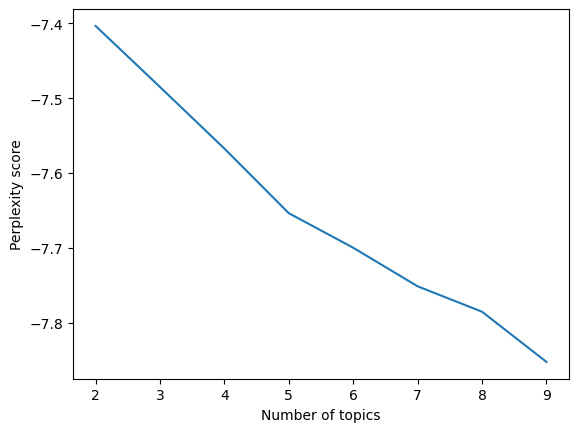

In [21]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

> 2.2.1 Coherence 그래프 만들기

In [22]:
coherence_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:59<00:00,  7.50s/it]


Text(0, 0.5, 'Coherence score')

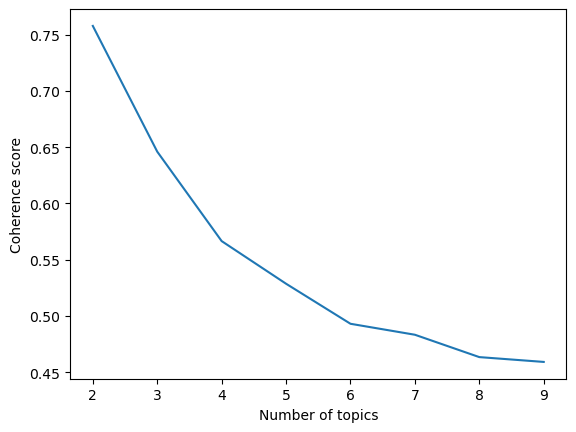

In [23]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

### 2.3 선정한 토픽 개수로 Action 넘버 매칭

In [25]:
topic_n = 4 # 액터가 5개의 주제에 대해 말하고 있다 -> 이것을 액션으로 바라봄, 5개의 액션
ldamodel = gensim.models.ldamodel.LdaModel(corpus, # BOW로 바꿔준 말뭉치
                                           num_topics = topic_n, # 토픽의 개수
                                           id2word=dictionary,
                                           random_state = 1, # 난수가 들어가 실행할 떄마다 다른 값이 나오지 않도록 하나로 고정
                                           passes=8)

In [26]:
#document에 대한 label(action number) , 액터가 어떤 액션을 하고 있는지 찾기, 이 액션이 몇 번 토픽에 해당하는지 라벨을 달아보기
#documentdp 대한 probability
# 두개를 가지고 가장 높은 확률값을 가진 action number 찾기

action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)): # 토픽 확률값을 얻어서 반복문을 돌리기. doc 안에는 하나의 문서에 대한 토픽확률이 들어있음
    label = []
    value = []
    for score in doc:       # 하나의 토픽에 대해서 0번일 확률, 1번일 확률, 2번일 확률
        label.append(score[0]) #토픽(=action N)
        value.append(score[1]) #토픽의 확률

    max_index = np.argmax(value)   #argmax 함수는 리스트에서 가장 max값 을 가진 인덱스를 반환, 최대값의 인덱스를 뽑아주는 역할
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 1025/1025 [00:00<00:00, 7259.02it/s]


In [27]:
df_cluster0['action_cluster'] = action_align
df_cluster0.head()

,Content_Clean,tagged_review,cluster,action_cluster
0,찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,"[찾다, 중요하다, 주의, 위, 정보, 일반, 건강, 정보, 개인, 건강, 상태, ...",0,1
1,되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,"[발렌타인, 초콜릿, 주다, 이유, 성질, 내지, 말, 주다, 남녀, 우울하다, 기...",0,0
2,다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,"[다니다, 좋다, 일이, 역시, 우리나라, 정신과, 인식, 안좋다, 거지, 감기, ...",0,3
3,나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,"[나아가다, 위해, 여러가지, 활동, 시도, 볼, 수, 이러하다, 아주, 작다, 활...",0,1
4,안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,"[안, 우울하다, 눕다, 하루, 망치다, 십상, 개인, 우울, 이유, 대처, 방안,...",0,1


In [28]:
df_cluster0 = df_cluster0.drop(columns=['tagged_review'])
df_cluster0.head()

,Content_Clean,cluster,action_cluster
0,찾는 것이 중요합니다 주의 위 정보는 일반적인 건강 정보이며 개인의 건강 상태에 따...,0,1
1,되는 것이고 발렌타인때 초콜릿을 주는 이유도 성질 내지 말라고 주는 것이다 남녀 우...,0,0
2,다니는 것도 좋은 일이야 역시 우리나라가 정신과 인식이 안좋은거지 감기걸리면 병원가...,0,3
3,나아가기 위해 여러가지 활동을 시도해 볼 수 있는데요 이러한 아주 작은 활동들은 긍...,0,1
4,안 하면 우울하다고 누워있다가 하루 망치기 십상이었습니다 제 개인적인 우울의 이유와...,0,1


In [29]:
with open("./Cluster5_action.pkl", 'wb') as f : # read binary
  pickle.dump(df_cluster0, f)

# ◆ 3. LDA 시각화 (LDAvis)


In [30]:
!pip install pyLDAvis

In [31]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [32]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary ) # 5가지 모델로 학습시킨 lda 모델 가져오고 원문 가진 corpus 넣어주고 전체 단어사전 dictionary 넣어준다.

In [33]:
pyLDAvis.save_html(prepared_data, 'my_lda_action_0.html')

In [34]:
pyLDAvis.display(prepared_data)

# ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.

In [35]:
# LDA 모델에서 모든 토픽과 그 번호를 가져오기
topics = ldamodel.show_topics(num_topics=-1, formatted=True) # -1은 가지고 있는 토픽 다 사용해달라는것.
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.025*"좋다" + 0.017*"우울하다" + 0.015*"보다" + 0.011*"수" + 0.010*"친구" + 0.008*"그렇다" + 0.008*"생각" + 0.008*"기분" + 0.007*"운동" + 0.007*"해보다"
Topic ID: 1, Description: 0.018*"상담" + 0.015*"수" + 0.014*"생각" + 0.013*"마음" + 0.013*"도움" + 0.012*"우울하다" + 0.010*"우울증" + 0.009*"좋다" + 0.008*"사람" + 0.008*"받다"
Topic ID: 2, Description: 0.015*"수" + 0.010*"좋다" + 0.009*"생각" + 0.009*"우울하다" + 0.009*"받다" + 0.007*"말" + 0.007*"스트레스" + 0.007*"우울증" + 0.007*"사람" + 0.007*"않다"
Topic ID: 3, Description: 0.013*"좋다" + 0.011*"생각" + 0.011*"않다" + 0.010*"보다" + 0.009*"수" + 0.008*"사람" + 0.008*"우울하다" + 0.007*"자다" + 0.007*"없다" + 0.007*"아니다"


In [36]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 2
    elif i == 1:
        n = 1 # 원문에 넘버링 된 토픽 번호와 LDA Viz 와 매칭해주기

    elif i == 2:
        n = 4
    elif i == 3:
        n = 3
    else:
        n = 0
    new_action_topic.append(n)

100%|██████████| 1025/1025 [00:00<00:00, 1025563.36it/s]


In [37]:
# 기존 컬럼 재배치
df_cluster0.action_cluster = new_action_topic

In [39]:
df_cluster0 = df_cluster0[['Content_Clean','cluster','action_cluster']]
df_cluster0.to_csv('Cluster_강건.csv', encoding='utf-8-sig')
df_cluster0.to_pickle('Cluster3_action.pkl')